# Hackathon Part 2

Scenario:

<img src="../Week07/images/justice.png">

You are a group of interns working for "Justice for All," a non-profit organization in Los Angeles. Ellen, the director, has come back from her board meeting, gushing at the euphora your maps created. Kazu, your manager, has decided to take an extensive leave of absence to take care of his daughter (his first!), so once again, it is up to you to fulfill Ellen's demands.

Part 1:

Create a map that shows areas in LA County that meet the following criteria:

- Is in the bottom quartile for median household income
- Is in the top quartile of public transit users
- Is in the top quartile of Percent Hispanic

Part 2:

Create a "majority" race map. That is, a map that shows for each census tract, which race category has the highest percentage.

In [1]:
# libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
# bring the data in
gdf = gpd.read_file('../Week07/data/acs2015_2019.geojson')

## Part 1

Here is a list of proposed steps (though not enforced by any means!):

- subset the data to only the three columns of interest + FIPS and geometry
- rename the long column headers to something short
- get the required quartile values
  - For example, to get the 25% quartile value:
    `gdf['column_name'].describe()['25%']`
- create a slice of the data that meets the desired criteria
  - income < 25th percentile
  - public transit > 75th percentile
  - % hispanic > 75th percentile
- map the tracts that are left!

In [3]:
list(gdf)

['FIPS',
 'Total Population',
 'Population Density (Per Sq. Mile)',
 '% Total Population: Male',
 '% Total Population: Female',
 '% Total Population: Under 5 Years',
 '% Total Population: 5 to 9 Years',
 '% Total Population: 10 to 14 Years',
 '% Total Population: 15 to 17 Years',
 '% Total Population: 18 to 24 Years',
 '% Total Population: 25 to 34 Years',
 '% Total Population: 35 to 44 Years',
 '% Total Population: 45 to 54 Years',
 '% Total Population: 55 to 64 Years',
 '% Total Population: 65 to 74 Years',
 '% Total Population: 75 to 84 Years',
 '% Total Population: 85 Years and Over',
 '% Total Population: White Alone',
 '% Total Population: Black or African American Alone',
 '% Total Population: American Indian and Alaska Native Alone',
 '% Total Population: Asian Alone',
 '% Total Population: Native Hawaiian and Other Pacific Islander Alone',
 '% Total Population: Some Other Race Alone',
 '% Total Population: Two or More Races',
 '% Total Population: Not Hispanic or Latino',
 '% 

In [4]:
# subset the data
gdf_part1 = gdf[['FIPS',
                 'geometry',
                 'Median Household Income (In 2019 Inflation Adjusted Dollars)',
                 '% Workers 16 Years and Over: Public Transportation (Includes Taxicab)',
                 '% Total Population: Hispanic or Latino']]

In [5]:
# rename columns
gdf_part1.columns = ['FIPS',
                 'geometry',
                 'Median Household Income',
                 '% Public Transportation',
                 '% Hispanic or Latino']

### Method 1

In [6]:
# get 25th percentile for median income
inc_25 = gdf_part1['Median Household Income'].describe()['25%']
inc_25

48191.0

In [7]:
# get 75th percentile for public transportation
trans_75 = gdf_part1['% Public Transportation'].describe()['75%']
trans_75

8.175

In [8]:
# get 75th percentile for Hispanic
hisp_75 = gdf_part1['% Hispanic or Latino'].describe()['75%']
hisp_75

73.08

In [9]:
# index 
gdf_sub = gdf_part1[(gdf_part1['Median Household Income']<inc_25) & 
    (gdf_part1['% Public Transportation']>trans_75) &
    (gdf_part1['% Hispanic or Latino']>hisp_75)]

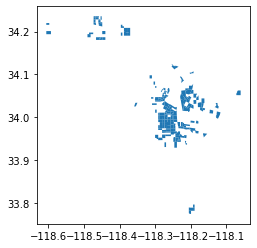

In [10]:
gdf_sub.plot()

### Method 2

In [11]:
gdf_part1['inc_quartile'] = pd.qcut(gdf_part1['Median Household Income'],4,labels=['Q1','Q2','Q3','Q4'])
# gdf_part1 = gdf_part1.assign(inc_quartile = pd.qcut(gdf_part1['Median Household Income'],4,labels=['Q1','Q2','Q3','Q4']))

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [12]:
gdf_part1['trans_quartile'] = pd.qcut(gdf_part1['% Public Transportation'],4,labels=['Q1','Q2','Q3','Q4'])

In [13]:
gdf_part1['hisp_quartile'] = pd.qcut(gdf_part1['% Hispanic or Latino'],4,labels=['Q1','Q2','Q3','Q4'])

In [14]:
gdf_part1.head()

,FIPS,geometry,Median Household Income,% Public Transportation,% Hispanic or Latino,inc_quartile,trans_quartile,hisp_quartile
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007...",63534.0,2.91,27.74,Q2,Q2,Q2
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031...",90389.0,0.93,4.32,Q3,Q1,Q1
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859...",44083.0,2.72,41.22,Q1,Q2,Q2
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859...",43713.0,3.01,36.84,Q1,Q2,Q2
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719...",81776.0,1.46,7.65,Q3,Q1,Q1


In [15]:
gdf_part1[(gdf_part1['inc_quartile']=='Q1') &
          (gdf_part1['trans_quartile']=='Q4') &
          (gdf_part1['hisp_quartile']=='Q4')
         ]

,FIPS,geometry,Median Household Income,% Public Transportation,% Hispanic or Latino,inc_quartile,trans_quartile,hisp_quartile
121,06037117405,"MULTIPOLYGON (((-118.47297 34.23237, -118.4729...",36538.0,9.58,92.75,Q1,Q4,Q4
122,06037117407,"MULTIPOLYGON (((-118.47297 34.23190, -118.4675...",33480.0,16.34,95.46,Q1,Q4,Q4
123,06037117408,"MULTIPOLYGON (((-118.47304 34.22469, -118.4730...",36250.0,10.11,79.89,Q1,Q4,Q4
124,06037117510,"MULTIPOLYGON (((-118.46749 34.23553, -118.4632...",46838.0,11.10,79.66,Q1,Q4,Q4
125,06037117520,"MULTIPOLYGON (((-118.46763 34.23150, -118.4675...",36003.0,14.63,82.29,Q1,Q4,Q4
...,...,...,...,...,...,...,...,...
1868,06037573002,"MULTIPOLYGON (((-118.19373 33.79168, -118.1937...",43825.0,14.49,73.74,Q1,Q4,Q4
1903,06037575401,"MULTIPOLYGON (((-118.20558 33.78834, -118.2056...",32452.0,20.93,80.51,Q1,Q4,Q4
1904,06037575402,"MULTIPOLYGON (((-118.19372 33.78368, -118.1937...",46199.0,22.73,82.71,Q1,Q4,Q4
1906,06037575801,"MULTIPOLYGON (((-118.20550 33.78264, -118.1993...",36573.0,11.88,74.49,Q1,Q4,Q4


In [16]:
# project to web mercator
gdf_sub=gdf_sub.to_crs('epsg:3857')

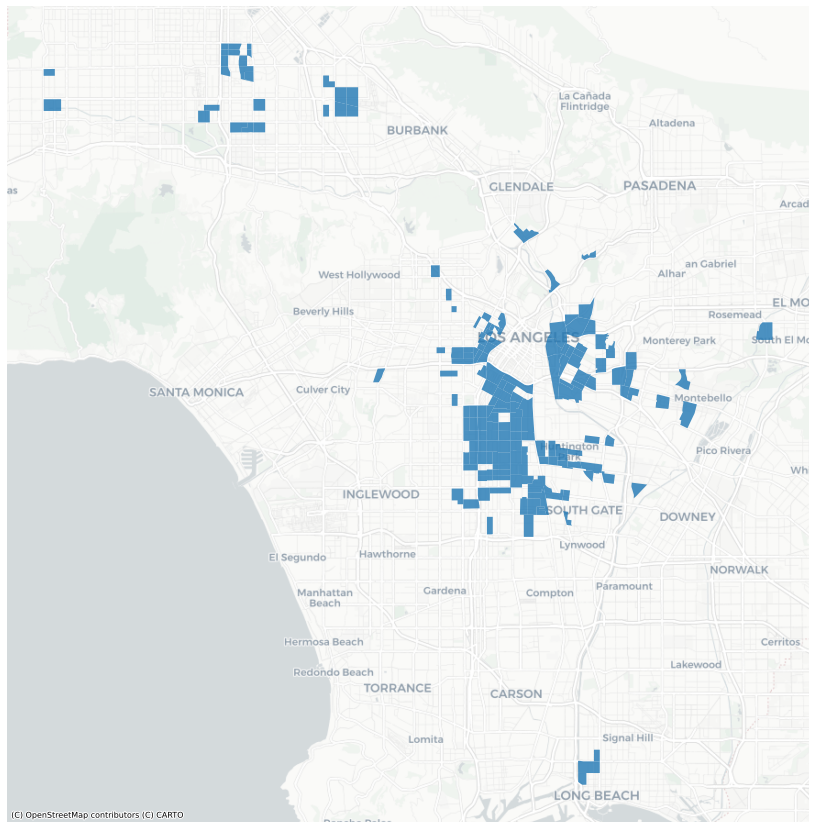

In [17]:
# plot it
fig,ax = plt.subplots(figsize=(15,15))

gdf_sub.plot(ax=ax,alpha=0.8)

ax.axis('off')

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## Part 2

- subset the data to only include the Non Hispanic race categories and the Total Hispanic column
- rename the columns to something much shorter
- create a new column, using `.idxmax(axis=1)` to identify which race category has the max value
  - follow this [stackoverflow post](https://stackoverflow.com/questions/62874419/how-to-return-the-highest-value-from-multiple-columns-to-a-new-column-in-a-panda)
- map it!

In [18]:
# list of columns to use
desired_columns = ['FIPS','geometry','% Total Population: Not Hispanic or Latino: White Alone',
 '% Total Population: Not Hispanic or Latino: Black or African American Alone',
 '% Total Population: Not Hispanic or Latino: American Indian and Alaska Native Alone',
 '% Total Population: Not Hispanic or Latino: Asian Alone',
 '% Total Population: Not Hispanic or Latino: Native Hawaiian and Other Pacific Islander Alone',
 '% Total Population: Not Hispanic or Latino: Some Other Race Alone',
 '% Total Population: Not Hispanic or Latino: Two or More Races',
 '% Total Population: Hispanic or Latino',]

In [19]:
# subset it
gdf_part2 = gdf[desired_columns].copy()

In [20]:
# show columns
list(gdf_part2)

['FIPS',
 'geometry',
 '% Total Population: Not Hispanic or Latino: White Alone',
 '% Total Population: Not Hispanic or Latino: Black or African American Alone',
 '% Total Population: Not Hispanic or Latino: American Indian and Alaska Native Alone',
 '% Total Population: Not Hispanic or Latino: Asian Alone',
 '% Total Population: Not Hispanic or Latino: Native Hawaiian and Other Pacific Islander Alone',
 '% Total Population: Not Hispanic or Latino: Some Other Race Alone',
 '% Total Population: Not Hispanic or Latino: Two or More Races',
 '% Total Population: Hispanic or Latino']

In [21]:
# rename columns
gdf_part2.columns=['FIPS',
 'geometry',
 'White',
 'Black',
 'American Indian and Alaska Native',
 'Asian',
 'Native Hawaiian and Other Pacific Islander',
 'Some Other Race',
 'Two or More Races',
 'Hispanic']

In [22]:
# create a new field "majority" and add the category that has the max value of all race categories
gdf_part2['majority'] = gdf_part2[['White',
 'Black',
 'American Indian and Alaska Native',
 'Asian',
 'Native Hawaiian and Other Pacific Islander',
 'Some Other Race',
 'Two or More Races',
 'Hispanic']].idxmax(axis=1)

In [23]:
gdf_part2.sample(10)

,FIPS,geometry,White,Black,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some Other Race,Two or More Races,Hispanic,majority
1024,06037302301,"MULTIPOLYGON (((-118.27227 34.14676, -118.2577...",60.00,0.75,0.15,15.71,0.00,0.00,1.73,21.66,White
1959,06037600912,"MULTIPOLYGON (((-118.34838 33.97145, -118.3462...",4.95,13.91,0.00,0.55,0.00,1.24,0.67,78.69,Hispanic
104,06037115103,"MULTIPOLYGON (((-118.53390 34.23730, -118.5340...",25.91,13.81,0.00,17.89,0.80,0.21,4.61,36.76,Hispanic
542,06037207400,"MULTIPOLYGON (((-118.25333 34.05864, -118.2488...",15.07,25.73,0.71,11.83,0.32,0.00,1.69,44.64,Hispanic
606,06037212420,"MULTIPOLYGON (((-118.30415 34.05588, -118.3041...",5.17,6.82,1.17,29.71,0.00,1.54,1.42,54.17,Hispanic
593,06037211910,"MULTIPOLYGON (((-118.30036 34.06720, -118.3003...",8.76,3.68,0.00,26.40,0.00,0.53,1.60,59.03,Hispanic
1587,06037533300,"MULTIPOLYGON (((-118.20450 33.98911, -118.2046...",1.26,0.36,0.00,0.00,0.00,0.24,0.15,98.00,Hispanic
595,06037211922,"MULTIPOLYGON (((-118.29665 34.06722, -118.2966...",5.75,7.07,1.25,44.36,0.28,0.00,0.24,41.05,Asian
1267,06037430002,"MULTIPOLYGON (((-117.96927 34.13222, -117.9668...",26.74,7.24,0.00,21.47,0.00,0.00,0.63,43.93,Hispanic
2195,06037900900,"MULTIPOLYGON (((-118.32428 34.70443, -118.3244...",64.16,9.76,0.37,1.57,0.22,0.25,2.74,20.93,White


In [24]:
gdf_part2=gdf_part2.to_crs('epsg:3857')

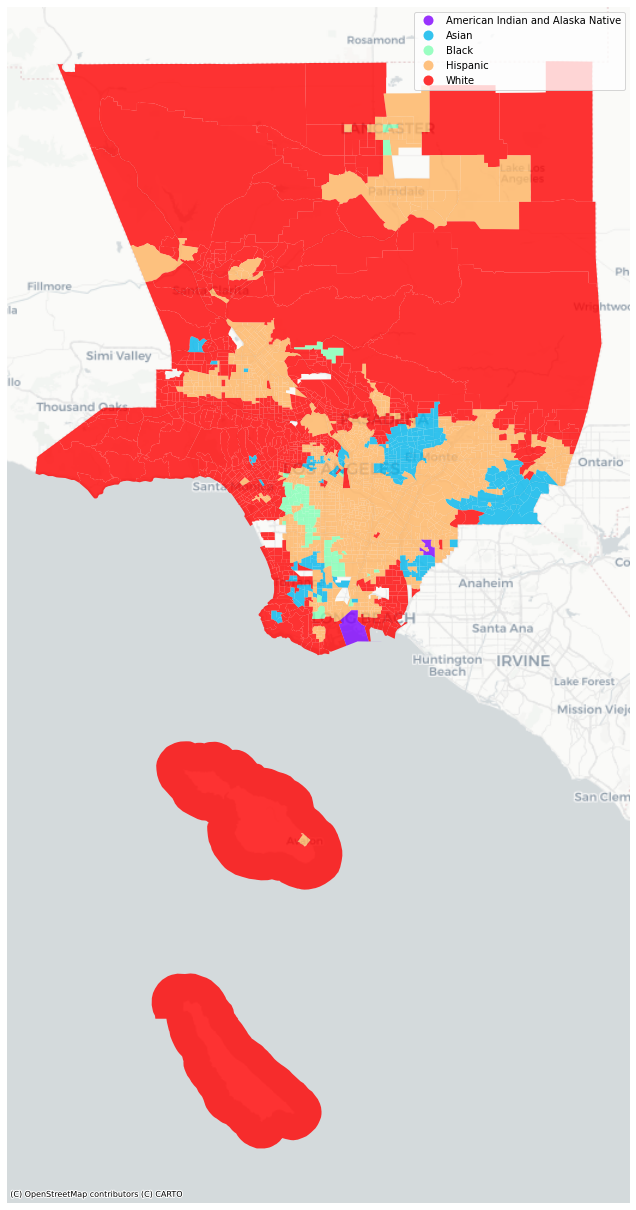

In [25]:
# plot it
fig,ax = plt.subplots(figsize=(22,22))

gdf_part2.plot(ax=ax,
               column = 'majority',
               cmap='rainbow',
               alpha=0.8,
               legend=True)

ax.axis('off')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)